In [1]:
import pandas as pd

# Load your data into a DataFrame
df = pd.read_csv('BA_reviews.csv')

In [2]:
# Check for missing values
print(df.isnull().sum())

Unnamed: 0                  0
review                      0
seat_type                   1
seat_comfort               83
cabin_staff_service        89
food_beverages            207
inflight_entertainment    454
value_for_money             0
recommended                 0
dtype: int64


In [3]:
# Check for duplicate rows
print(df.duplicated().sum())

0


In [4]:
# Drop rows with missing values in the 'seat_type' column
df = df.dropna(subset=['seat_type'])

In [5]:
# Define the columns to fill missing values
columns = ['seat_comfort', 'cabin_staff_service', 'food_beverages', 'inflight_entertainment']

# Fill missing values with the mean value of each column
for col in columns:
    df[col] = df[col].fillna(df[col].mean())

In [6]:
# Check for missing values
print(df.isnull().sum())

Unnamed: 0                0
review                    0
seat_type                 0
seat_comfort              0
cabin_staff_service       0
food_beverages            0
inflight_entertainment    0
value_for_money           0
recommended               0
dtype: int64


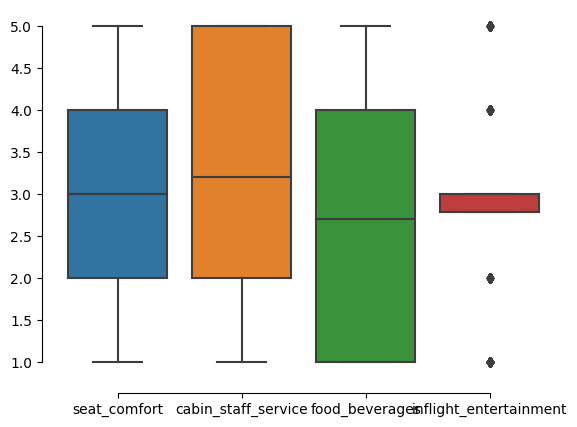

In [8]:
import seaborn as sns
# Define the columns to check for outliers
columns = ['seat_comfort', 'cabin_staff_service', 'food_beverages', 'inflight_entertainment']

# Create a box plot for each column
sns.boxplot(data=df[columns])
sns.despine(offset=10, trim=True)

In [9]:
# Calculate the IQR for the 'inflight_entertainment' column
Q1 = df['inflight_entertainment'].quantile(0.25)
Q3 = df['inflight_entertainment'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from the 'inflight_entertainment' column
df = df[(df['inflight_entertainment'] >= lower_bound) & (df['inflight_entertainment'] <= upper_bound)]

In [10]:
# Check for outliers
print(df['inflight_entertainment'].describe())

count    575.000000
mean       2.835509
std        0.085438
min        2.791209
25%        2.791209
50%        2.791209
75%        2.791209
max        3.000000
Name: inflight_entertainment, dtype: float64


In [11]:
# Split the text in the 'review' column into two parts
df[['verification', 'reviews']] = df['review'].str.split('|', expand=True, n=1)

In [12]:
# Drop the 'review' column
df = df.drop('review', axis=1)

In [13]:
# Define the new column order
columns = ['verification', 'reviews', 'seat_type', 'seat_comfort', 'cabin_staff_service', 'food_beverages', 'inflight_entertainment', 'value_for_money', 'recommended']

# Rearrange the columns in the DataFrame
df = df.reindex(columns=columns)

In [14]:
display(df)

,verification,reviews,seat_type,seat_comfort,cabin_staff_service,food_beverages,inflight_entertainment,value_for_money,recommended
0,✅ Trip Verified,Late boarding led to a one hour flight leavi...,Business,3.000000,3.000000,1.000000,2.791209,1,no
1,✅ Trip Verified,As usual the flight is delayed. BA try to bla...,Solo Leisure,2.790622,3.207464,2.711223,2.791209,1,no
3,✅ Trip Verified,Couldn’t book in online. Arrived at check in...,Couple Leisure,3.000000,3.000000,1.000000,2.791209,1,no
4,✅ Trip Verified,London Heathrow to Mumbai in a Boeing 787-8 i...,Couple Leisure,4.000000,5.000000,5.000000,3.000000,4,yes
5,✅ Trip Verified,"Keflavík, Iceland to London Heathrow on an A3...",Couple Leisure,3.000000,5.000000,4.000000,2.791209,3,yes
...,...,...,...,...,...,...,...,...,...
986,✅ Trip Verified,Bangkok to London. Seating and interior old ...,Business,3.000000,2.000000,2.000000,3.000000,2,no
988,✅ Trip Verified,London to Vienna. I was shocked that BA prov...,Business,2.000000,3.000000,2.711223,2.791209,2,no
994,Not Verified,Calgary to Rome via London. My wife and I bo...,Couple Leisure,4.000000,1.000000,1.000000,2.791209,1,no
998,Not Verified,Dublin to London. I was trying to add additio...,Solo Leisure,1.000000,1.000000,2.711223,2.791209,1,no


In [16]:
# View the unique values in the 'verification' column
print(df['verification'].unique())

['✅ Trip Verified ' 'Not Verified ' '❎ Not Verified ']


In [17]:
# Define the values to drop
values_to_drop = ['Not Verified', '❎ Not Verified']

# Drop rows where the 'verification' column contains the specified values
df = df[~df['verification'].isin(values_to_drop)]

In [19]:
# Drop the 'verification' column
df = df.drop('verification', axis=1)

In [21]:
# Define the columns to convert
columns = ['seat_comfort', 'cabin_staff_service', 'food_beverages', 'inflight_entertainment', 'value_for_money']

# Convert the data type of the specified columns to integer
df[columns] = df[columns].astype(int)

In [22]:
display(df)

,reviews,seat_type,seat_comfort,cabin_staff_service,food_beverages,inflight_entertainment,value_for_money,recommended
0,Late boarding led to a one hour flight leavi...,Business,3,3,1,2,1,no
1,As usual the flight is delayed. BA try to bla...,Solo Leisure,2,3,2,2,1,no
3,Couldn’t book in online. Arrived at check in...,Couple Leisure,3,3,1,2,1,no
4,London Heathrow to Mumbai in a Boeing 787-8 i...,Couple Leisure,4,5,5,3,4,yes
5,"Keflavík, Iceland to London Heathrow on an A3...",Couple Leisure,3,5,4,2,3,yes
...,...,...,...,...,...,...,...,...
986,Bangkok to London. Seating and interior old ...,Business,3,2,2,3,2,no
988,London to Vienna. I was shocked that BA prov...,Business,2,3,2,2,2,no
994,Calgary to Rome via London. My wife and I bo...,Couple Leisure,4,1,1,2,1,no
998,Dublin to London. I was trying to add additio...,Solo Leisure,1,1,2,2,1,no


In [38]:
!pip install nltk

In [40]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from textblob import TextBlob

In [24]:
!pip install emoji --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 361.8/361.8 kB 5.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for emoji: filename=emoji-2.7.0-py2.py3-none-any.whl size=356563 sha256=492966ff8bd9e404ebc9d62f75b57d063e83dd74c8506ae85c64901fdabba72c
  Stored in directory: /root/.cache/pip/wheels/41/11/48/5df0b9727d5669c9174a141134f10304d1d78a3b89a4676f3d
Successfully built emoji


In [25]:
from emoji import demojize

In [29]:
# Task 1: Perform text lowering
df['reviews'] = df['reviews'].str.lower()

In [30]:
# Task 2: Remove URLs using regular expressions
url_pattern = re.compile(r'https?://\S+|www\.\S+')
df['reviews'] = df['reviews'].apply(lambda text: url_pattern.sub(r'', text))

In [31]:
# Task 3: Remove punctuation marks
df['reviews'] = df['reviews'].str.replace('[^\w\s]', '')

<ipython-input-31-9c9ad1c5a104>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['reviews'] = df['reviews'].str.replace('[^\w\s]', '')


In [35]:
# Task 4: Spelling corrections using TextBlob
df['reviews'] = df['reviews'].apply(lambda text: str(TextBlob(text).correct()))

In [36]:
# Task 5: Remove emojis using demojize
df['reviews'] = df['reviews'].apply(lambda text: demojize(text))

In [41]:
# Task 6: Remove stop words
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
df['reviews'] = df['reviews'].apply(lambda text: ' '.join([word for word in text.split() if word not in stop_words]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [42]:
# Task 7: Perform stemming using PorterStemmer
stemmer = PorterStemmer()
df['reviews'] = df['reviews'].apply(lambda text: ' '.join([stemmer.stem(word) for word in text.split()]))

In [43]:
display(df.head())

,reviews,seat_type,seat_comfort,cabin_staff_service,food_beverages,inflight_entertainment,value_for_money,recommended
0,late board led one hour flight leav two hour l...,Business,3,3,1,2,1,no
1,usual flight delay ba tri blame someon inabl i...,Solo Leisure,2,3,2,2,1,no
3,book onlin arriv check find bump due oversel b...,Couple Leisure,3,3,1,2,1,no
4,london heathrow lumbar 7878 busi class loung n...,Couple Leisure,4,5,5,3,4,yes
5,keflavík iceland london heathrow a320 busi cla...,Couple Leisure,3,5,4,2,3,yes


In [44]:
import pickle

In [46]:
pickle.dump(df.to_dict(),open("BA_dict.pkl", "wb"))